# Checking some central plots to see if they hold up when accounting for degree of annotation completeness

Only done with EC coverage so far, need to confirm with general annotation completeness.

Also includes histograms for annotation completeness for different domains.
- currently lacking metagenomes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
archaea_df = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Archaea/archaea_core_df.csv')
bacteria_df = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Bacteria/bacteria_core_df.csv')
eukarya_df = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Eukarya/eukarya_core_df.csv')
metagenome_df = pd.read_csv('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/Metagenomes/metagenome_core_df.csv')

In [3]:
archaea_df = archaea_df.loc[(archaea_df['Gene Count'] >= 200) & 
                            (archaea_df['#cpds'] >= 100) &
                            (archaea_df['#rxns'] >= 50) &
                            (archaea_df['#ecs'] >= 50)]

bacteria_df = bacteria_df.loc[(bacteria_df['Gene Count'] >= 200) & 
                            (bacteria_df['#cpds'] >= 100) &
                            (bacteria_df['#rxns'] >= 50) &
                            (bacteria_df['#ecs'] >= 50)]

eukarya_df = eukarya_df.loc[(eukarya_df['Gene Count'] >= 200) & 
                            (eukarya_df['#cpds'] >= 100) &
                            (eukarya_df['#rxns'] >= 50) &
                            (eukarya_df['#ecs'] >= 50)]

metagenome_df = metagenome_df.loc[(metagenome_df['Gene Count'] >= 1000) & 
                            (metagenome_df['#cpds'] >= 500) &
                            (metagenome_df['#rxns'] >= 500) &
                            (metagenome_df['#ecs'] >= 500)]

In [7]:
top_euks = eukarya_df.sort_values(by=['Protein coding genes with function prediction (%)'], ascending=False)
bot_euks = eukarya_df.sort_values(by=['Protein coding genes with function prediction (%)'], ascending=True)

## eukarya fungal annotation weirdness 
So, apparently all the fungi in eukarya are mis-annotated. These are IMG fungal copies which are wonky and I was told, by the MycoCosm PI @ JGI to use the MycoCosm annotations. I'm going to deal with this, for the moment, by simply removing eukarya under some threshold % functional annotation.

Making the cutoff 10% brings the df size down to 498 (from 710)

In [18]:
eukarya_df_nofungi = eukarya_df.loc[eukarya_df['Protein coding genes with function prediction (%)'] >= 10]
len(eukarya_df_nofungi)

498

# EUKARYA
**best covered genome** = *Tricholoma vaccinum*, a fungi sequenced at GATC Biotech in Germany with 100% functional assignment \
**2nd best covered genome** = *Volvox carteri*, a green algae sequenced at JGI with 98.2% functional assignment \
**3rd best** = *Chlamydomonas reinhardtii*, a green algae sequenced at JGI with 97.98% functional assignment \
**4th best** = *Selaginella moellendorffii*, an ancient vascular plant model organism sequenced at JGI with 97.64% functional assignment \
**5th best** = *Coccomyxa subellipsoidea C-169*, a microalgae sequenced at JGI with 97.48% functional assignment \

- note that most of these organisms have poor connections to KO and, thus, to enzyme assignments

**worst covered** = *Pichia membranifaciens NRRL Y-2026*, plant pathogen infecting strawberries, sequenced at JGI but only has 1 gene with functional assignment lol? \
**2nd worst** = *Agaricus bisporus sv. burnettii JB137-s8*, a secondary decomposer fungus, which plays an ecologically significant role in the degradation of leaf and needle litter in temperate forests; only 75 genes with function prediction but 1400 genes with enzyme assignment...**what the hell?** \
**3rd worst** = *Pisolithus microcarpus 441*, ecologically relevant fungi; 172 functional proteins and 1400 enzyme genes again...whaaaat \ 
**4th worst** = *Pisolithus tinctorius Marx 270*, a earth-ball fungus? same deal as above... \
**5th worst** = *Aspergillus aculeatus*, fungus associated with plant disease and yes same deal as above wtf
- weirdness where v low functional assignment but decent enzyme assignment

In [8]:
np.mean(archaea_df['Protein coding genes with function prediction (%)'])

63.162634361233486

In [21]:
print('Mean CDS function prediction among JGI archaea = {}%'.format(round(np.mean(archaea_df['Protein coding genes with function prediction (%)']),2)))
print('Mean CDS function prediction among JGI bacteria = {}%'.format(round(np.mean(bacteria_df['Protein coding genes with function prediction (%)']),2)))
print('Mean CDS function prediction among JGI eukarya = {}%'.format(round(np.mean(eukarya_df['Protein coding genes with function prediction (%)']),2)))
#print('Mean CDS function prediction among JGI metagenomes = {}%'.format(round(np.mean(metagenome_df['Protein coding genes with function prediction (%)']),2)))

print('Standard deviation of CDS function prediction among JGI archaea = {}'.format(round(np.std(archaea_df['Protein coding genes with function prediction (%)']),2)))
print('Standard deviation of CDS function prediction among JGI bacteria = {}'.format(round(np.std(bacteria_df['Protein coding genes with function prediction (%)']),2)))
print('Standard deviation of CDS function prediction among JGI eukarya = {}'.format(round(np.std(eukarya_df['Protein coding genes with function prediction (%)']),2)))
#print('Standard deviation of CDS function prediction among JGI metagenomes = {}'.format(round(np.std(metagenome_df['Protein coding genes with function prediction (%)']),2)))


Mean CDS function prediction among JGI archaea = 63.16%
Mean CDS function prediction among JGI bacteria = 69.19%
Mean CDS function prediction among JGI eukarya = 55.29%
Standard deviation of CDS function prediction among JGI archaea = 7.51
Standard deviation of CDS function prediction among JGI bacteria = 7.6
Standard deviation of CDS function prediction among JGI eukarya = 27.32


In [ ]:
print('Mean archaea CDS with enzyme prediction = {}%'.format(round(np.mean(archaea_df['Protein coding genes with enzymes (%)']),2)))
print('Mean bacteria CDS with enzymes prediction = {}%'.format(round(np.mean(bacteria_df['Protein coding genes with enzymes (%)']),2)))
print('Mean eukarya CDS with enzymes prediction = {}%'.format(round(np.mean(eukarya_df['Protein coding genes with enzymes (%)']),2)))

print('Standard deviation of CDS enzyme prediction among JGI archaea = {}'.format(round(np.std(archaea_df['Protein coding genes with enzymes (%)']),2)))
print('Standard deviation of CDS enzyme prediction among JGI bacteria = {}'.format(round(np.std(bacteria_df['Protein coding genes with enzymes (%)']),2)))
print('Standard deviation of CDS enzyme prediction among JGI eukarya = {}'.format(round(np.std(eukarya_df['Protein coding genes with enzymes (%)']),2)))


In [ ]:
print('Mean archaea CDS with KO assignment = {}%'.format(round(np.mean(archaea_df['Protein coding genes connected to KEGG Orthology (KO) (%)']),2)))
print('Mean bacteria CDS with KO assignment = {}%'.format(round(np.mean(bacteria_df['Protein coding genes connected to KEGG Orthology (KO) (%)']),2)))
print('Mean eukarya CDS with KO assignment = {}%'.format(round(np.mean(eukarya_df['Protein coding genes connected to KEGG Orthology (KO) (%)']),2)))

print('Standard deviation of CDS KO assignment among JGI archaea = {}'.format(round(np.std(archaea_df['Protein coding genes connected to KEGG Orthology (KO) (%)']),2)))
print('Standard deviation of CDS KO assignment among JGI bacteria = {}'.format(round(np.std(bacteria_df['Protein coding genes connected to KEGG Orthology (KO) (%)']),2)))
print('Standard deviation of CDS KO assignemnt among JGI eukarya = {}'.format(round(np.std(eukarya_df['Protein coding genes connected to KEGG Orthology (KO) (%)']),2)))


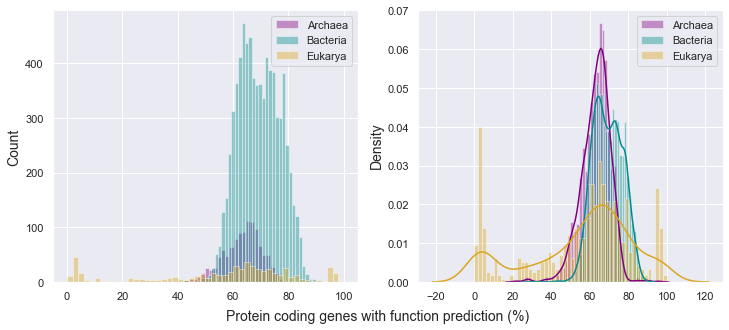

In [22]:
np.warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(figsize=(12,5), ncols=2)

ax1.set_ylabel('Count', fontsize=14)
#ax2.set_ylabel('Kernel Density Estimation', fontsize=14)

fig.text(0.5, 0.02, 'Protein coding genes with function prediction (%)', ha='center', fontsize=14)
fig.text(0.5, 0.45, 'Density', rotation=90, ha='center', fontsize=14)

sns.distplot(archaea_df['Protein coding genes with function prediction (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Archaea', color='purple')
sns.distplot(bacteria_df['Protein coding genes with function prediction (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Bacteria', color='darkcyan')
sns.distplot(eukarya_df['Protein coding genes with function prediction (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Eukarya', color='goldenrod')

sns.distplot(archaea_df['Protein coding genes with function prediction (%)'], ax=ax2, axlabel=False, bins=50, label='Archaea', color='purple')
sns.distplot(bacteria_df['Protein coding genes with function prediction (%)'], ax=ax2, axlabel=False, bins=50, label='Bacteria', color='darkcyan')
sns.distplot(eukarya_df['Protein coding genes with function prediction (%)'], ax=ax2, axlabel=False, bins=50, label='Eukarya', color='goldenrod')

ax1.legend()
ax2.legend()

#plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/CDS_function_prediction')




Best covered genome = *Tricholoma vaccinum*, a fungi sequenced at GATC Biotech in Germany with 100% functional assignment <- **THIS IS NOW SUS** \
2nd best covered genome = Volvox carteri, a green algae sequenced at JGI with 98.2% functional assignment

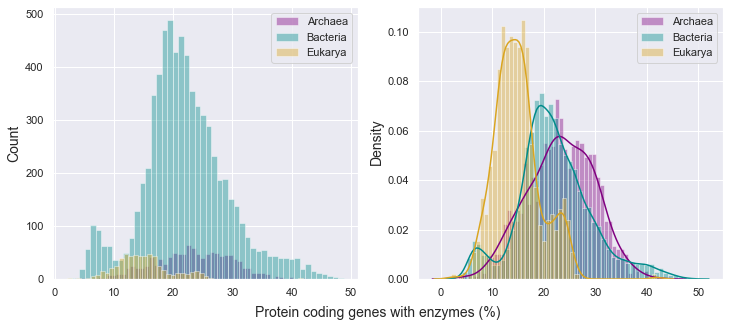

In [23]:
np.warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(figsize=(12,5), ncols=2)

ax1.set_ylabel('Count', fontsize=14)
#ax2.set_ylabel('Kernel Density Estimation', fontsize=14)

fig.text(0.5, 0.02, 'Protein coding genes with enzymes (%)', ha='center', fontsize=14)
fig.text(0.5, 0.45, 'Density', rotation=90, ha='center', fontsize=14)

sns.distplot(archaea_df['Protein coding genes with enzymes (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Archaea', color='purple')
sns.distplot(bacteria_df['Protein coding genes with enzymes (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Bacteria', color='darkcyan')
sns.distplot(eukarya_df['Protein coding genes with enzymes (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Eukarya', color='goldenrod')
sns.distplot(archaea_df['Protein coding genes with enzymes (%)'], ax=ax2, axlabel=False, bins=50, label='Archaea', color='purple')
sns.distplot(bacteria_df['Protein coding genes with enzymes (%)'], ax=ax2, axlabel=False, bins=50, label='Bacteria', color='darkcyan')
sns.distplot(eukarya_df['Protein coding genes with enzymes (%)'], ax=ax2, axlabel=False, bins=50, label='Eukarya', color='goldenrod')

ax1.legend()
ax2.legend()

#plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/CDS_with_enzymes_3domains')

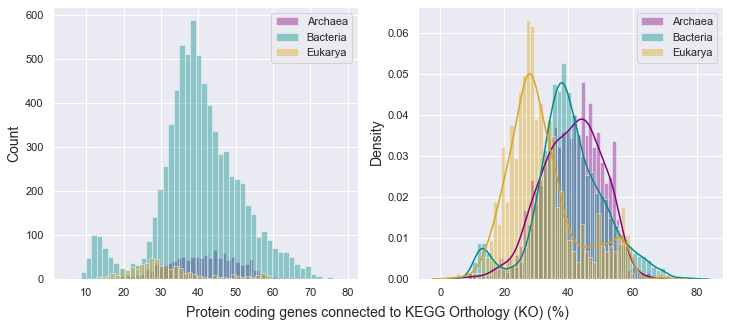

In [24]:
np.warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(figsize=(12,5), ncols=2)

ax1.set_ylabel('Count', fontsize=14)
#ax2.set_ylabel('Kernel Density Estimation', fontsize=14)

fig.text(0.5, 0.02, 'Protein coding genes connected to KEGG Orthology (KO) (%)', ha='center', fontsize=14)
fig.text(0.5, 0.45, 'Density', rotation=90, ha='center', fontsize=14)

sns.distplot(archaea_df['Protein coding genes connected to KEGG Orthology (KO) (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Archaea', color='purple')
sns.distplot(bacteria_df['Protein coding genes connected to KEGG Orthology (KO) (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Bacteria', color='darkcyan')
sns.distplot(eukarya_df['Protein coding genes connected to KEGG Orthology (KO) (%)'], ax=ax1, axlabel=False, kde=False, bins=50, label='Eukarya', color='goldenrod')
sns.distplot(archaea_df['Protein coding genes connected to KEGG Orthology (KO) (%)'], ax=ax2, axlabel=False, bins=50, label='Archaea', color='purple')
sns.distplot(bacteria_df['Protein coding genes connected to KEGG Orthology (KO) (%)'], ax=ax2, axlabel=False, bins=50, label='Bacteria', color='darkcyan')
sns.distplot(eukarya_df['Protein coding genes connected to KEGG Orthology (KO) (%)'], ax=ax2, axlabel=False, bins=50, label='Eukarya', color='goldenrod')

ax1.legend()
ax2.legend()

plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/CDS_KO_3domains')




In [89]:
(len(bacteria_df_ec010) + len(bacteria_df_ec1020) + len(bacteria_df_ec2030) + len(bacteria_df_ec3040) +
   len(bacteria_df_ec4050))

6976

In [91]:
bacteria_df

,Unnamed: 0,Domain,Genome Size,Gene Count,#cpds,#rxns,ec1,ec2,ec3,ec4,...,Protein coding genes connected to KEGG Orthology (KO) (count),Protein coding genes connected to KEGG Orthology (KO) (%),#ecs,ec1 fracs,ec2 fracs,ec3 fracs,ec4 fracs,ec5 fracs,ec6 fracs,ec7 fracs
0,2784746793,Bacteria,3452107,2948,1266,1134,116,220,148,61,...,NaN,NaN,646,0.179567,0.340557,0.229102,0.094427,0.063467,0.092879,0.0
1,2710264650,Bacteria,917216,956,344,256,19,64,42,10,...,347.0,36.30,182,0.104396,0.351648,0.230769,0.054945,0.098901,0.159341,0.0
2,2626541885,Bacteria,1272956,1278,429,278,27,64,54,5,...,467.0,36.54,196,0.137755,0.326531,0.275510,0.025510,0.071429,0.163265,0.0
3,2626542074,Bacteria,324145,333,162,95,3,22,23,3,...,131.0,39.34,64,0.046875,0.343750,0.359375,0.046875,0.046875,0.156250,0.0
4,2795386111,Bacteria,9289576,8432,1774,1685,199,272,189,107,...,NaN,NaN,906,0.219647,0.300221,0.208609,0.118102,0.067329,0.086093,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,2698536814,Bacteria,3221676,2918,1236,1122,111,192,118,67,...,NaN,NaN,595,0.186555,0.322689,0.198319,0.112605,0.080672,0.099160,0.0
15416,2264867117,Bacteria,1150991,1106,503,366,37,74,45,17,...,NaN,NaN,215,0.172093,0.344186,0.209302,0.079070,0.069767,0.125581,0.0
15417,2770939440,Bacteria,5350779,4416,1208,1201,129,219,149,81,...,NaN,NaN,692,0.186416,0.316474,0.215318,0.117052,0.073699,0.091040,0.0
15418,2626542024,Bacteria,1288159,1317,434,314,22,73,42,14,...,426.0,32.35,205,0.107317,0.356098,0.204878,0.068293,0.102439,0.160976,0.0


In [84]:
archaea_df_ec010 = archaea_df.loc[(archaea_df['Protein coding genes with enzymes (%)'] > 0) &
                                  (archaea_df['Protein coding genes with enzymes (%)'] <= 10)]
archaea_df_ec1020 = archaea_df.loc[(archaea_df['Protein coding genes with enzymes (%)'] > 10) &
                                  (archaea_df['Protein coding genes with enzymes (%)'] <= 20)]
archaea_df_ec2030 = archaea_df.loc[(archaea_df['Protein coding genes with enzymes (%)'] > 20) &
                                  (archaea_df['Protein coding genes with enzymes (%)'] <= 30)]
archaea_df_ec3040 = archaea_df.loc[(archaea_df['Protein coding genes with enzymes (%)'] > 30) &
                                  (archaea_df['Protein coding genes with enzymes (%)'] <= 40)]
archaea_df_ec4050 = archaea_df.loc[(archaea_df['Protein coding genes with enzymes (%)'] > 40) &
                                  (archaea_df['Protein coding genes with enzymes (%)'] <= 50)]

bacteria_df_ec010 = bacteria_df.loc[(bacteria_df['Protein coding genes with enzymes (%)'] > 0) &
                                  (bacteria_df['Protein coding genes with enzymes (%)'] <= 10)]
bacteria_df_ec1020 = bacteria_df.loc[(bacteria_df['Protein coding genes with enzymes (%)'] > 10) &
                                  (bacteria_df['Protein coding genes with enzymes (%)'] <= 20)]
bacteria_df_ec2030 = bacteria_df.loc[(bacteria_df['Protein coding genes with enzymes (%)'] > 20) &
                                  (bacteria_df['Protein coding genes with enzymes (%)'] <= 30)]
bacteria_df_ec3040 = bacteria_df.loc[(bacteria_df['Protein coding genes with enzymes (%)'] > 30) &
                                  (bacteria_df['Protein coding genes with enzymes (%)'] <= 40)]
bacteria_df_ec4050 = bacteria_df.loc[(bacteria_df['Protein coding genes with enzymes (%)'] > 40) &
                                  (bacteria_df['Protein coding genes with enzymes (%)'] <= 50)]

eukarya_df_ec010 = eukarya_df.loc[(eukarya_df['Protein coding genes with enzymes (%)'] > 0) &
                                  (eukarya_df['Protein coding genes with enzymes (%)'] <= 10)]
eukarya_df_ec1020 = eukarya_df.loc[(eukarya_df['Protein coding genes with enzymes (%)'] > 10) &
                                  (eukarya_df['Protein coding genes with enzymes (%)'] <= 20)]
eukarya_df_ec2030 = eukarya_df.loc[(eukarya_df['Protein coding genes with enzymes (%)'] > 20) &
                                  (eukarya_df['Protein coding genes with enzymes (%)'] <= 30)]
eukarya_df_ec3040 = eukarya_df.loc[(eukarya_df['Protein coding genes with enzymes (%)'] > 30) &
                                  (eukarya_df['Protein coding genes with enzymes (%)'] <= 40)]
eukarya_df_ec4050 = eukarya_df.loc[(eukarya_df['Protein coding genes with enzymes (%)'] > 40) &
                                  (eukarya_df['Protein coding genes with enzymes (%)'] <= 50)]

# INTRAdomain EC comparison plots
blank space

blanck spaice

spank blace

In [110]:
eukarya_df_ec3040

,Unnamed: 0,Domain,Genome Size,Gene Count,#cpds,#rxns,ec1,ec2,ec3,ec4,...,Protein coding genes connected to KEGG Orthology (KO) (count),Protein coding genes connected to KEGG Orthology (KO) (%),#ecs,ec1 fracs,ec2 fracs,ec3 fracs,ec4 fracs,ec5 fracs,ec6 fracs,ec7 fracs


In [112]:
archaea_df_ec4050

,Unnamed: 0,Domain,Genome Size,Gene Count,#cpds,#rxns,ec1,ec2,ec3,ec4,...,Protein coding genes connected to KEGG Orthology (KO) (count),Protein coding genes connected to KEGG Orthology (KO) (%),#ecs,ec1 fracs,ec2 fracs,ec3 fracs,ec4 fracs,ec5 fracs,ec6 fracs,ec7 fracs
680,2524023112,Archaea,278181,490,323,193,23,45,13,20,...,306.0,62.45,128,0.179688,0.351562,0.101562,0.156250,0.046875,0.164062,0.0
777,2648501531,Archaea,216922,274,258,148,22,37,16,12,...,167.0,60.95,103,0.213592,0.359223,0.155340,0.116505,0.077670,0.077670,0.0


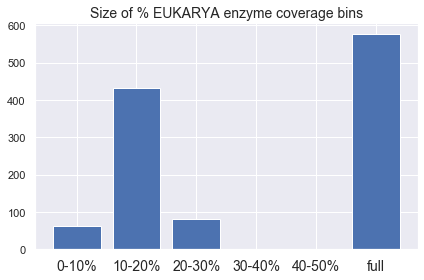

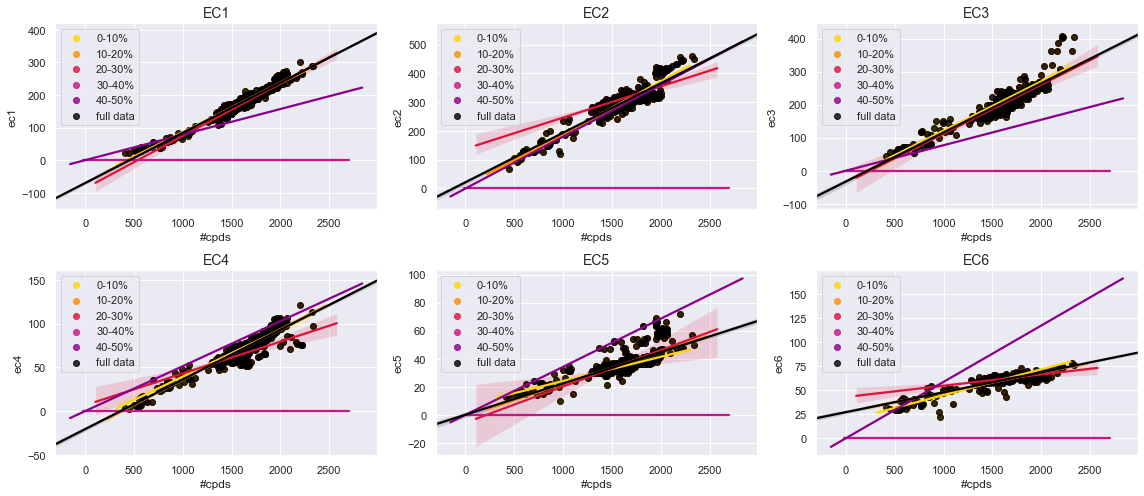

In [98]:
heights = [len(eukarya_df_ec010), len(eukarya_df_ec1020), len(eukarya_df_ec2030), len(eukarya_df_ec3040), len(eukarya_df_ec4050), len(eukarya_df)]
bars = ('0-10%', '10-20%', '20-30%', '30-40%', '40-50%', 'full')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, heights)
plt.xticks(y_pos, bars, fontsize=14)
plt.title('Size of % EUKARYA enzyme coverage bins', fontsize=14)
plt.tight_layout()
plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/eukarya_EC%_distribution')
plt.show()


fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

c = ['gold', 'darkorange', 'crimson', 'mediumvioletred', 'darkmagenta', 'black']

sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec1'], ax=ax[0][0], label='0-10%', color='gold')
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec1'], ax=ax[0][0], label='10-20%', color='darkorange')
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec1'], ax=ax[0][0], label='20-30%', color='crimson')
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec1'], ax=ax[0][0], label='30-40%', color='mediumvioletred')
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec1'], ax=ax[0][0], label='40-50%', color='darkmagenta')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec1'], ax=ax[0][0], label='full data', color='black')
ax[0][0].set_title('EC1', fontsize=14)
ax[0][0].legend(loc='best')

sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec2'], ax=ax[0][1], label='0-10%', color='gold')
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec2'], ax=ax[0][1], label='10-20%', color='darkorange')
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec2'], ax=ax[0][1], label='20-30%', color='crimson')
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec2'], ax=ax[0][1], label='30-40%', color='mediumvioletred')
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec2'], ax=ax[0][1], label='40-50%', color='darkmagenta')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec2'], ax=ax[0][1], label='full data', color='black')
ax[0][1].set_title('EC2', fontsize=14)
ax[0][1].legend(loc='best')

sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec3'], ax=ax[0][2], label='0-10%', color='gold')
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec3'], ax=ax[0][2], label='10-20%', color='darkorange')
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec3'], ax=ax[0][2], label='20-30%', color='crimson')
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec3'], ax=ax[0][2], label='30-40%', color='mediumvioletred')
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec3'], ax=ax[0][2], label='40-50%', color='darkmagenta')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec3'], ax=ax[0][2], label='full data', color='black')
ax[0][2].set_title('EC3', fontsize=14)
ax[0][2].legend(loc='best')

sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec4'], ax=ax[1][0], label='0-10%', color=c[0])
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec4'], ax=ax[1][0], label='10-20%', color=c[1])
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec4'], ax=ax[1][0], label='20-30%', color=c[2])
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec4'], ax=ax[1][0], label='30-40%', color=c[3])
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec4'], ax=ax[1][0], label='40-50%', color=c[4])
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec4'], ax=ax[1][0], label='full data', color=c[5])
ax[1][0].set_title('EC4', fontsize=14)
ax[1][0].legend(loc='best')

sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec5'], ax=ax[1][1], label='0-10%', color=c[0])
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec5'], ax=ax[1][1], label='10-20%', color=c[1])
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec5'], ax=ax[1][1], label='20-30%', color=c[2])
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec5'], ax=ax[1][1], label='30-40%', color=c[3])
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec5'], ax=ax[1][1], label='40-50%', color=c[4])
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec5'], ax=ax[1][1], label='full data', color=c[5])
ax[1][1].set_title('EC5', fontsize=14)
ax[1][1].legend(loc='best')

sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec6'], ax=ax[1][2], label='0-10%', color=c[0])
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec6'], ax=ax[1][2], label='10-20%', color=c[1])
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec6'], ax=ax[1][2], label='20-30%', color=c[2])
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec6'], ax=ax[1][2], label='30-40%', color=c[3])
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec6'], ax=ax[1][2], label='40-50%', color=c[4])
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec6'], ax=ax[1][2], label='full data', color=c[5])
ax[1][2].set_title('EC6', fontsize=14)
ax[1][2].legend(loc='best')
plt.tight_layout()
plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/eukarya_ec%_comparisons')


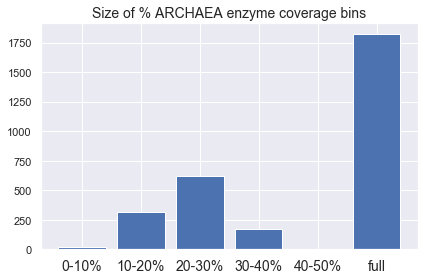

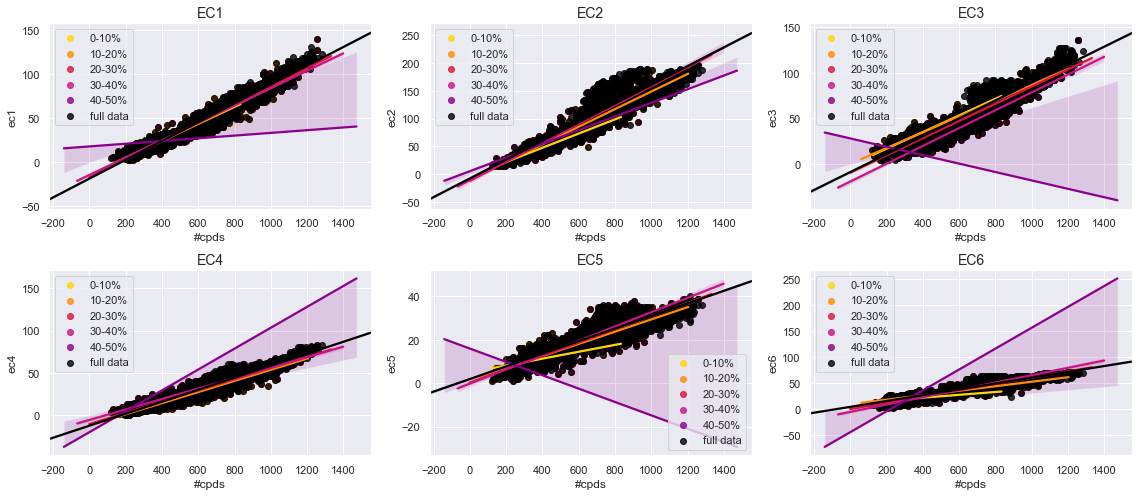

In [99]:
heights = [len(archaea_df_ec010), len(archaea_df_ec1020), len(archaea_df_ec2030), len(archaea_df_ec3040),
           len(archaea_df_ec4050), len(archaea_df)]
bars = ('0-10%', '10-20%', '20-30%', '30-40%', '40-50%', 'full')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, heights)
plt.xticks(y_pos, bars, fontsize=14)
plt.title('Size of % ARCHAEA enzyme coverage bins', fontsize=14)
plt.tight_layout()
plt.savefig('archaea_EC%_distribution')
plt.show()

fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

c = ['gold', 'darkorange', 'crimson', 'mediumvioletred', 'darkmagenta', 'black']

sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec1'], ax=ax[0][0], label='0-10%', color='gold')
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec1'], ax=ax[0][0], label='10-20%', color='darkorange')
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec1'], ax=ax[0][0], label='20-30%', color='crimson')
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec1'], ax=ax[0][0], label='30-40%', color='mediumvioletred')
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec1'], ax=ax[0][0], label='40-50%', color='darkmagenta')
sns.regplot(archaea_df['#cpds'], archaea_df['ec1'], ax=ax[0][0], label='full data', color='black')
ax[0][0].set_title('EC1', fontsize=14)
ax[0][0].legend(loc='best')

sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec2'], ax=ax[0][1], label='0-10%', color='gold')
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec2'], ax=ax[0][1], label='10-20%', color='darkorange')
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec2'], ax=ax[0][1], label='20-30%', color='crimson')
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec2'], ax=ax[0][1], label='30-40%', color='mediumvioletred')
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec2'], ax=ax[0][1], label='40-50%', color='darkmagenta')
sns.regplot(archaea_df['#cpds'], archaea_df['ec2'], ax=ax[0][1], label='full data', color='black')
ax[0][1].set_title('EC2', fontsize=14)
ax[0][1].legend(loc='best')

sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec3'], ax=ax[0][2], label='0-10%', color='gold')
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec3'], ax=ax[0][2], label='10-20%', color='darkorange')
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec3'], ax=ax[0][2], label='20-30%', color='crimson')
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec3'], ax=ax[0][2], label='30-40%', color='mediumvioletred')
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec3'], ax=ax[0][2], label='40-50%', color='darkmagenta')
sns.regplot(archaea_df['#cpds'], archaea_df['ec3'], ax=ax[0][2], label='full data', color='black')
ax[0][2].set_title('EC3', fontsize=14)
ax[0][2].legend(loc='best')

sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec4'], ax=ax[1][0], label='0-10%', color='gold')
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec4'], ax=ax[1][0], label='10-20%', color='darkorange')
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec4'], ax=ax[1][0], label='20-30%', color='crimson')
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec4'], ax=ax[1][0], label='30-40%', color='mediumvioletred')
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec4'], ax=ax[1][0], label='40-50%', color='darkmagenta')
sns.regplot(archaea_df['#cpds'], archaea_df['ec4'], ax=ax[1][0], label='full data', color='black')
ax[1][0].set_title('EC4', fontsize=14)
ax[1][0].legend(loc='best')

sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec5'], ax=ax[1][1], label='0-10%', color=c[0])
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec5'], ax=ax[1][1], label='10-20%', color=c[1])
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec5'], ax=ax[1][1], label='20-30%', color=c[2])
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec5'], ax=ax[1][1], label='30-40%', color=c[3])
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec5'], ax=ax[1][1], label='40-50%', color=c[4])
sns.regplot(archaea_df['#cpds'], archaea_df['ec5'], ax=ax[1][1], label='full data', color=c[5])
ax[1][1].set_title('EC5', fontsize=14)
ax[1][1].legend(loc='best')

sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec6'], ax=ax[1][2], label='0-10%', color=c[0])
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec6'], ax=ax[1][2], label='10-20%', color=c[1])
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec6'], ax=ax[1][2], label='20-30%', color=c[2])
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec6'], ax=ax[1][2], label='30-40%', color=c[3])
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec6'], ax=ax[1][2], label='40-50%', color=c[4])
sns.regplot(archaea_df['#cpds'], archaea_df['ec6'], ax=ax[1][2], label='full data', color=c[5])
ax[1][2].set_title('EC6', fontsize=14)
ax[1][2].legend(loc='best')
plt.tight_layout()
plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/archaea_ec%_comparisons')


## Bacteria gene stats issue
Disturbingly, it seems like there was a hidden error when the gene stats were pulled for bacteria. About half of the taxa pulled nonsense and or nearly incomplete tables. Bradley has been contacted, but I might have to dig into this myself. Shiiit lol

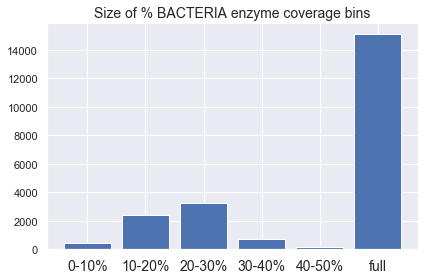

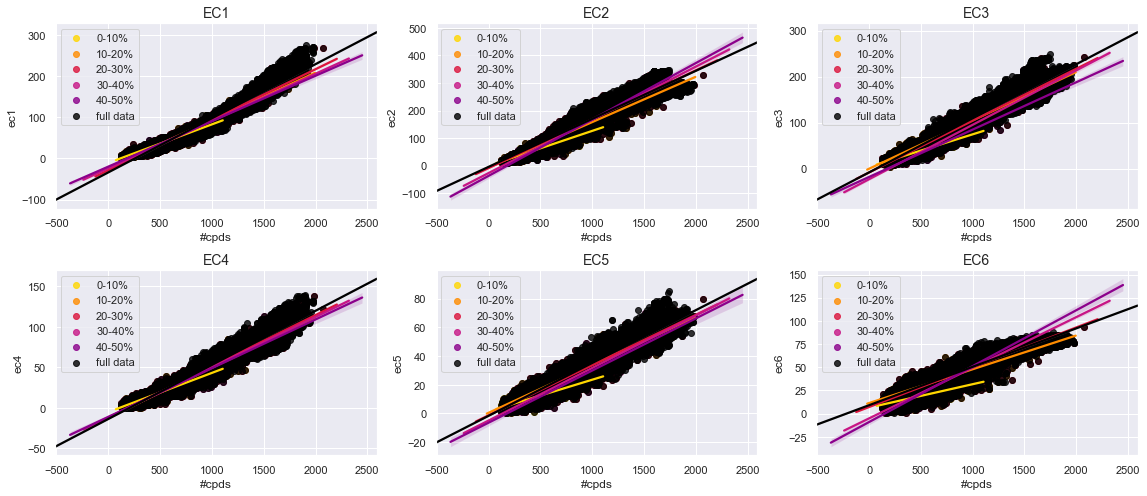

In [97]:
heights = [len(bacteria_df_ec010), len(bacteria_df_ec1020), len(bacteria_df_ec2030), len(bacteria_df_ec3040),
           len(bacteria_df_ec4050), len(bacteria_df)]
bars = ('0-10%', '10-20%', '20-30%', '30-40%', '40-50%', 'full')
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, heights)
plt.xticks(y_pos, bars, fontsize=14)
plt.title('Size of % BACTERIA enzyme coverage bins', fontsize=14)
plt.tight_layout()
plt.savefig('bacteria_EC%_distribution')
plt.show()

fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

c = ['gold', 'darkorange', 'crimson', 'mediumvioletred', 'darkmagenta', 'black']

sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec1'], ax=ax[0][0], label='0-10%', color='gold')
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec1'], ax=ax[0][0], label='10-20%', color='darkorange')
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec1'], ax=ax[0][0], label='20-30%', color='crimson')
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec1'], ax=ax[0][0], label='30-40%', color='mediumvioletred')
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec1'], ax=ax[0][0], label='40-50%', color='darkmagenta')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec1'], ax=ax[0][0], label='full data', color='black')
ax[0][0].set_title('EC1', fontsize=14)
ax[0][0].legend(loc='best')

sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec2'], ax=ax[0][1], label='0-10%', color='gold')
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec2'], ax=ax[0][1], label='10-20%', color='darkorange')
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec2'], ax=ax[0][1], label='20-30%', color='crimson')
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec2'], ax=ax[0][1], label='30-40%', color='mediumvioletred')
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec2'], ax=ax[0][1], label='40-50%', color='darkmagenta')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec2'], ax=ax[0][1], label='full data', color='black')
ax[0][1].set_title('EC2', fontsize=14)
ax[0][1].legend(loc='best')

sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec3'], ax=ax[0][2], label='0-10%', color='gold')
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec3'], ax=ax[0][2], label='10-20%', color='darkorange')
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec3'], ax=ax[0][2], label='20-30%', color='crimson')
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec3'], ax=ax[0][2], label='30-40%', color='mediumvioletred')
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec3'], ax=ax[0][2], label='40-50%', color='darkmagenta')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec3'], ax=ax[0][2], label='full data', color='black')
ax[0][2].set_title('EC3', fontsize=14)
ax[0][2].legend(loc='best')

sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec4'], ax=ax[1][0], label='0-10%', color='gold')
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec4'], ax=ax[1][0], label='10-20%', color='darkorange')
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec4'], ax=ax[1][0], label='20-30%', color='crimson')
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec4'], ax=ax[1][0], label='30-40%', color='mediumvioletred')
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec4'], ax=ax[1][0], label='40-50%', color='darkmagenta')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec4'], ax=ax[1][0], label='full data', color='black')
ax[1][0].set_title('EC4', fontsize=14)
ax[1][0].legend(loc='best')

sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec5'], ax=ax[1][1], label='0-10%', color=c[0])
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec5'], ax=ax[1][1], label='10-20%', color=c[1])
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec5'], ax=ax[1][1], label='20-30%', color=c[2])
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec5'], ax=ax[1][1], label='30-40%', color=c[3])
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec5'], ax=ax[1][1], label='40-50%', color=c[4])
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec5'], ax=ax[1][1], label='full data', color=c[5])
ax[1][1].set_title('EC5', fontsize=14)
ax[1][1].legend(loc='best')

sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec6'], ax=ax[1][2], label='0-10%', color=c[0])
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec6'], ax=ax[1][2], label='10-20%', color=c[1])
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec6'], ax=ax[1][2], label='20-30%', color=c[2])
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec6'], ax=ax[1][2], label='30-40%', color=c[3])
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec6'], ax=ax[1][2], label='40-50%', color=c[4])
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec6'], ax=ax[1][2], label='full data', color=c[5])
ax[1][2].set_title('EC6', fontsize=14)
ax[1][2].legend(loc='best')
plt.tight_layout()
plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/bacteria_ec%_comparisons')


# Domain comparison plots
blank space

blanck spaice

spank blace

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


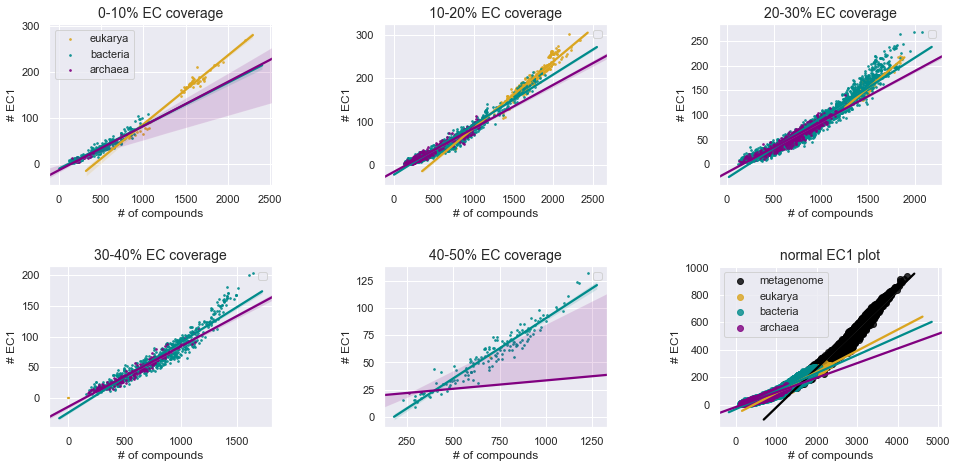

In [116]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec1'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec1'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec1'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec1'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec1'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec1'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec1'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec1'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec1'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec1'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec1'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec1'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec1'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec1'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec1'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[1][2], color='black', label='metagenome')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec1'], ax=ax[1][2], color='goldenrod', label='eukarya')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec1'], ax=ax[1][2], color='darkcyan', label='bacteria')
sns.regplot(archaea_df['#cpds'], archaea_df['ec1'], ax=ax[1][2], color='purple', label='archaea')

ax[0][0].set_title("0-10% EC coverage", fontsize=14)
ax[0][1].set_title("10-20% EC coverage", fontsize=14)
ax[0][2].set_title("20-30% EC coverage", fontsize=14)
ax[1][0].set_title("30-40% EC coverage", fontsize=14)
ax[1][1].set_title("40-50% EC coverage", fontsize=14)
ax[1][2].set_title("normal EC1 plot", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# EC1', fontsize=12)
ax[0][1].set_ylabel('# EC1', fontsize=12)
ax[0][2].set_ylabel('# EC1', fontsize=12)
ax[1][0].set_ylabel('# EC1', fontsize=12)
ax[1][1].set_ylabel('# EC1', fontsize=12)
ax[1][2].set_ylabel('# EC1', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


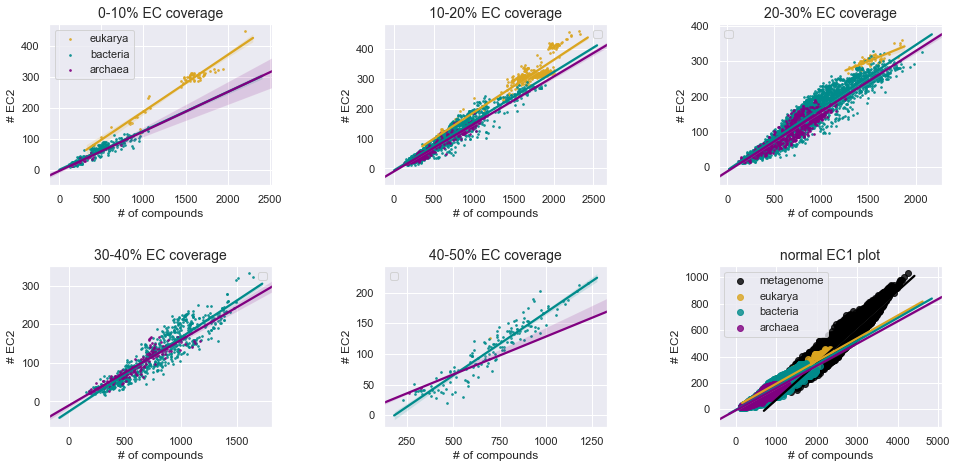

In [117]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec2'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec2'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec2'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec2'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec2'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec2'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec2'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec2'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec2'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec2'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec2'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec2'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec2'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec2'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec2'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[1][2], color='black', label='metagenome')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec2'], ax=ax[1][2], color='goldenrod', label='eukarya')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec2'], ax=ax[1][2], color='darkcyan', label='bacteria')
sns.regplot(archaea_df['#cpds'], archaea_df['ec2'], ax=ax[1][2], color='purple', label='archaea')

ax[0][0].set_title("0-10% EC coverage", fontsize=14)
ax[0][1].set_title("10-20% EC coverage", fontsize=14)
ax[0][2].set_title("20-30% EC coverage", fontsize=14)
ax[1][0].set_title("30-40% EC coverage", fontsize=14)
ax[1][1].set_title("40-50% EC coverage", fontsize=14)
ax[1][2].set_title("normal EC2 plot", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# EC2', fontsize=12)
ax[0][1].set_ylabel('# EC2', fontsize=12)
ax[0][2].set_ylabel('# EC2', fontsize=12)
ax[1][0].set_ylabel('# EC2', fontsize=12)
ax[1][1].set_ylabel('# EC2', fontsize=12)
ax[1][2].set_ylabel('# EC2', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


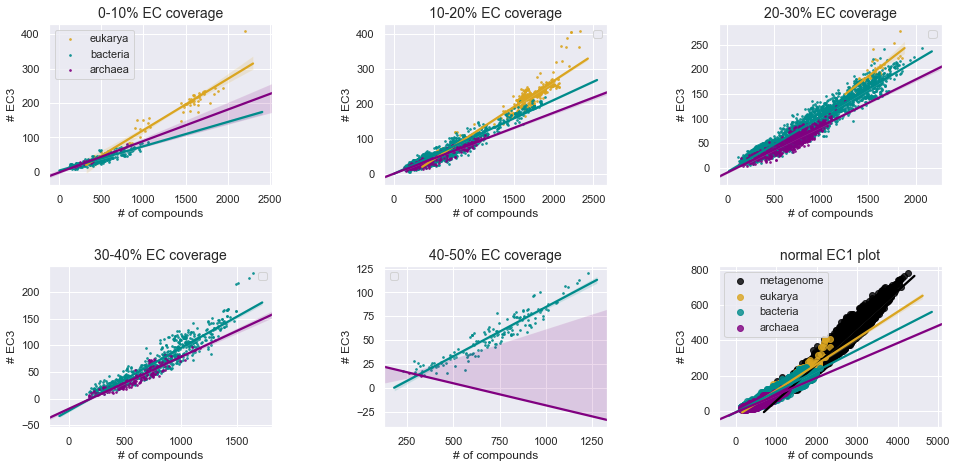

In [118]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec3'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec3'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec3'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec3'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec3'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec3'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec3'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec3'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec3'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec3'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec3'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec3'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec3'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec3'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec3'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[1][2], color='black', label='metagenome')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec3'], ax=ax[1][2], color='goldenrod', label='eukarya')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec3'], ax=ax[1][2], color='darkcyan', label='bacteria')
sns.regplot(archaea_df['#cpds'], archaea_df['ec3'], ax=ax[1][2], color='purple', label='archaea')

ax[0][0].set_title("0-10% EC coverage", fontsize=14)
ax[0][1].set_title("10-20% EC coverage", fontsize=14)
ax[0][2].set_title("20-30% EC coverage", fontsize=14)
ax[1][0].set_title("30-40% EC coverage", fontsize=14)
ax[1][1].set_title("40-50% EC coverage", fontsize=14)
ax[1][2].set_title("normal EC3 plot", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# EC3', fontsize=12)
ax[0][1].set_ylabel('# EC3', fontsize=12)
ax[0][2].set_ylabel('# EC3', fontsize=12)
ax[1][0].set_ylabel('# EC3', fontsize=12)
ax[1][1].set_ylabel('# EC3', fontsize=12)
ax[1][2].set_ylabel('# EC3', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


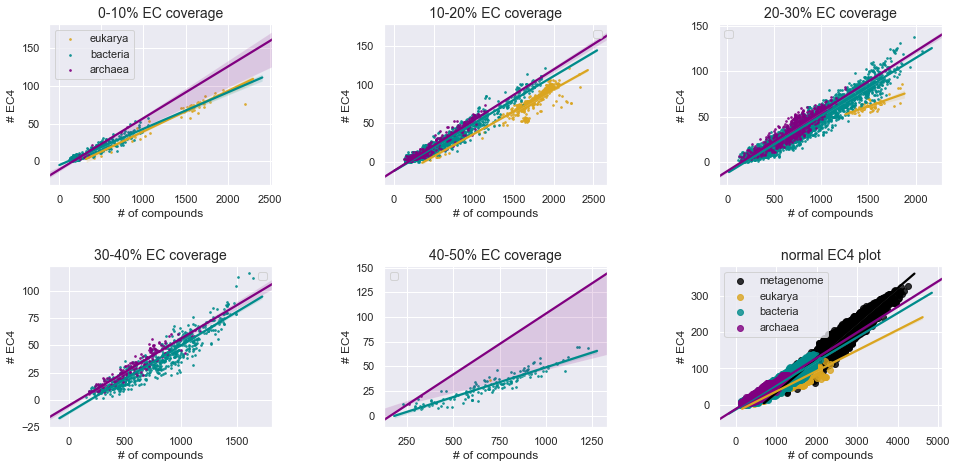

In [119]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec4'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec4'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec4'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec4'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec4'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec4'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec4'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec4'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec4'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec4'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec4'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec4'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec4'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec4'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec4'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][2], color='black', label='metagenome')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec4'], ax=ax[1][2], color='goldenrod', label='eukarya')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec4'], ax=ax[1][2], color='darkcyan', label='bacteria')
sns.regplot(archaea_df['#cpds'], archaea_df['ec4'], ax=ax[1][2], color='purple', label='archaea')

ax[0][0].set_title("0-10% EC coverage", fontsize=14)
ax[0][1].set_title("10-20% EC coverage", fontsize=14)
ax[0][2].set_title("20-30% EC coverage", fontsize=14)
ax[1][0].set_title("30-40% EC coverage", fontsize=14)
ax[1][1].set_title("40-50% EC coverage", fontsize=14)
ax[1][2].set_title("normal EC4 plot", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# EC4', fontsize=12)
ax[0][1].set_ylabel('# EC4', fontsize=12)
ax[0][2].set_ylabel('# EC4', fontsize=12)
ax[1][0].set_ylabel('# EC4', fontsize=12)
ax[1][1].set_ylabel('# EC4', fontsize=12)
ax[1][2].set_ylabel('# EC4', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


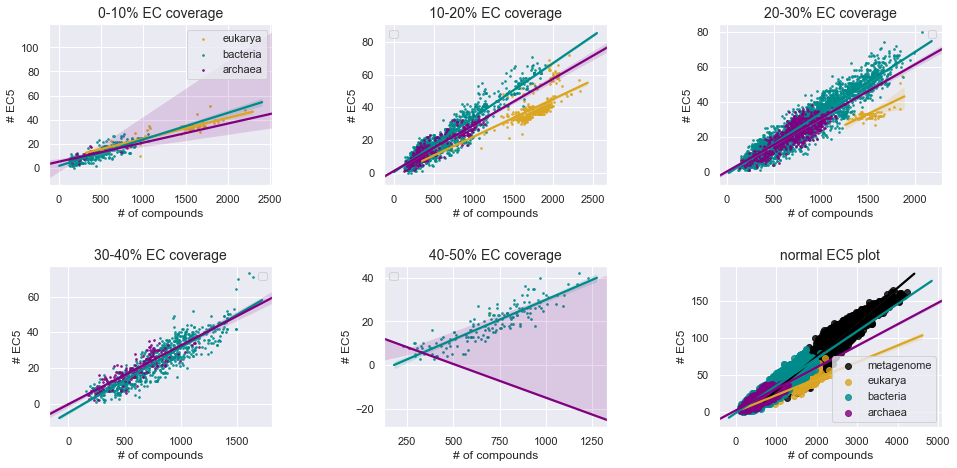

In [120]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec5'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec5'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec5'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec5'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec5'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec5'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec5'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec5'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec5'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec5'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec5'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec5'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec5'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec5'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec5'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][2], color='black', label='metagenome')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec5'], ax=ax[1][2], color='goldenrod', label='eukarya')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec5'], ax=ax[1][2], color='darkcyan', label='bacteria')
sns.regplot(archaea_df['#cpds'], archaea_df['ec5'], ax=ax[1][2], color='purple', label='archaea')

ax[0][0].set_title("0-10% EC coverage", fontsize=14)
ax[0][1].set_title("10-20% EC coverage", fontsize=14)
ax[0][2].set_title("20-30% EC coverage", fontsize=14)
ax[1][0].set_title("30-40% EC coverage", fontsize=14)
ax[1][1].set_title("40-50% EC coverage", fontsize=14)
ax[1][2].set_title("normal EC5 plot", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# EC5', fontsize=12)
ax[0][1].set_ylabel('# EC5', fontsize=12)
ax[0][2].set_ylabel('# EC5', fontsize=12)
ax[1][0].set_ylabel('# EC5', fontsize=12)
ax[1][1].set_ylabel('# EC5', fontsize=12)
ax[1][2].set_ylabel('# EC5', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


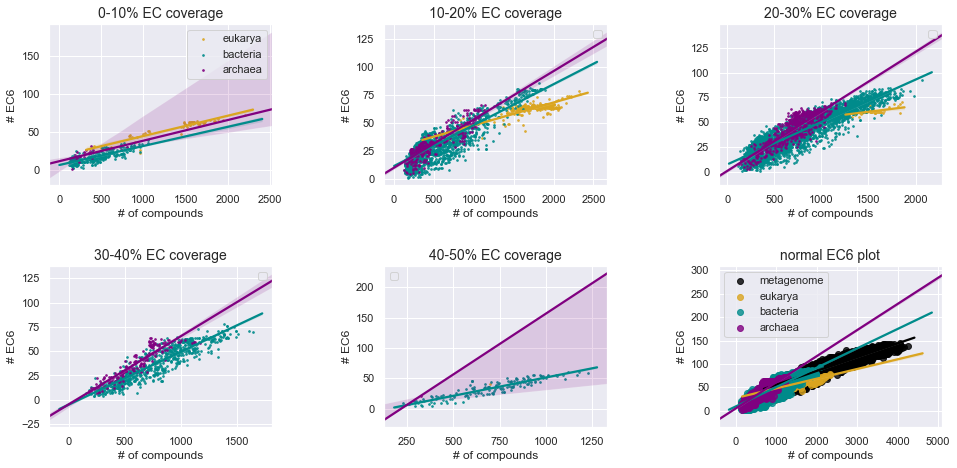

In [121]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec010['#cpds'], eukarya_df_ec010['ec6'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec010['#cpds'], bacteria_df_ec010['ec6'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec010['#cpds'], archaea_df_ec010['ec6'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec1020['#cpds'], eukarya_df_ec1020['ec6'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec1020['#cpds'], bacteria_df_ec1020['ec6'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec1020['#cpds'], archaea_df_ec1020['ec6'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec2030['#cpds'], eukarya_df_ec2030['ec6'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec2030['#cpds'], bacteria_df_ec2030['ec6'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec2030['#cpds'], archaea_df_ec2030['ec6'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec3040['#cpds'], eukarya_df_ec3040['ec6'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec3040['#cpds'], bacteria_df_ec3040['ec6'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec3040['#cpds'], archaea_df_ec3040['ec6'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

#sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df_ec4050['#cpds'], eukarya_df_ec4050['ec6'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df_ec4050['#cpds'], bacteria_df_ec4050['ec6'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df_ec4050['#cpds'], archaea_df_ec4050['ec6'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec6'], ax=ax[1][2], color='black', label='metagenome')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec6'], ax=ax[1][2], color='goldenrod', label='eukarya')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec6'], ax=ax[1][2], color='darkcyan', label='bacteria')
sns.regplot(archaea_df['#cpds'], archaea_df['ec6'], ax=ax[1][2], color='purple', label='archaea')

ax[0][0].set_title("0-10% EC coverage", fontsize=14)
ax[0][1].set_title("10-20% EC coverage", fontsize=14)
ax[0][2].set_title("20-30% EC coverage", fontsize=14)
ax[1][0].set_title("30-40% EC coverage", fontsize=14)
ax[1][1].set_title("40-50% EC coverage", fontsize=14)
ax[1][2].set_title("normal EC6 plot", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# EC6', fontsize=12)
ax[0][1].set_ylabel('# EC6', fontsize=12)
ax[0][2].set_ylabel('# EC6', fontsize=12)
ax[1][0].set_ylabel('# EC6', fontsize=12)
ax[1][1].set_ylabel('# EC6', fontsize=12)
ax[1][2].set_ylabel('# EC6', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


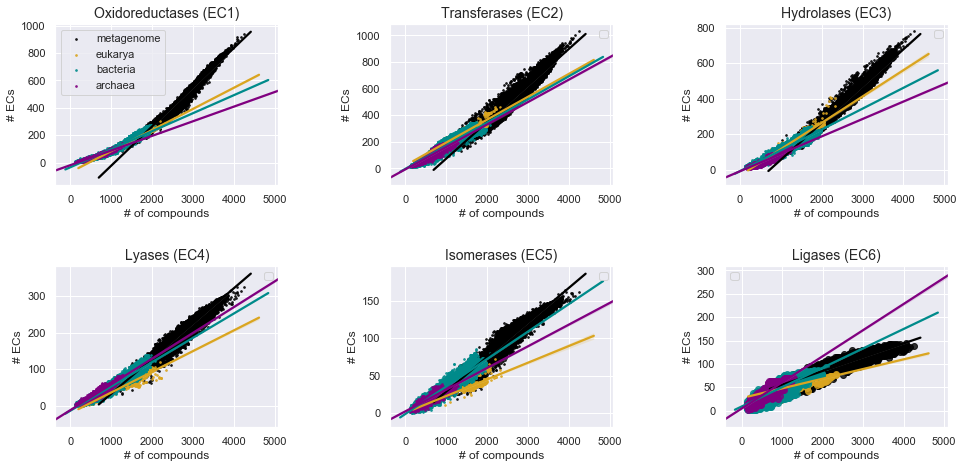

In [26]:
fig, ax = plt.subplots(figsize=(16,7), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .5    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec1'], ax=ax[0][0], fit_reg=True, label='metagenome', color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec1'], ax=ax[0][0], fit_reg=True, label='eukarya', color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec1'], ax=ax[0][0], fit_reg=True, label='bacteria', color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df['#cpds'], archaea_df['ec1'], ax=ax[0][0], fit_reg=True, label='archaea', color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec2'], ax=ax[0][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec2'], ax=ax[0][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec2'], ax=ax[0][1], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df['#cpds'], archaea_df['ec2'], ax=ax[0][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec3'], ax=ax[0][2], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec3'], ax=ax[0][2], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec3'], ax=ax[0][2], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df['#cpds'], archaea_df['ec3'], ax=ax[0][2], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec4'], ax=ax[1][0], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec4'], ax=ax[1][0], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec4'], ax=ax[1][0], color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df['#cpds'], archaea_df['ec4'], ax=ax[1][0], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec5'], ax=ax[1][1], color='black', scatter_kws={'s':3})
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec5'], ax=ax[1][1], color='goldenrod', scatter_kws={'s':3})
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec5'], ax=ax[1][1],  color='darkcyan', scatter_kws={'s':3})
sns.regplot(archaea_df['#cpds'], archaea_df['ec5'], ax=ax[1][1], color='purple', scatter_kws={'s':3})

sns.regplot(metagenome_df['#cpds'], metagenome_df['ec6'], ax=ax[1][2], color='black')
sns.regplot(eukarya_df['#cpds'], eukarya_df['ec6'], ax=ax[1][2], color='goldenrod')
sns.regplot(bacteria_df['#cpds'], bacteria_df['ec6'], ax=ax[1][2], color='darkcyan')
sns.regplot(archaea_df['#cpds'], archaea_df['ec6'], ax=ax[1][2], color='purple')

ax[0][0].set_title("Oxidoreductases (EC1)", fontsize=14)
ax[0][1].set_title("Transferases (EC2)", fontsize=14)
ax[0][2].set_title("Hydrolases (EC3)", fontsize=14)
ax[1][0].set_title("Lyases (EC4)", fontsize=14)
ax[1][1].set_title("Isomerases (EC5)", fontsize=14)
ax[1][2].set_title("Ligases (EC6)", fontsize=14)

ax[0][0].set_xlabel('# of compounds', fontsize=12)
ax[0][1].set_xlabel('# of compounds', fontsize=12)
ax[0][2].set_xlabel('# of compounds', fontsize=12)
ax[1][0].set_xlabel('# of compounds', fontsize=12)
ax[1][1].set_xlabel('# of compounds', fontsize=12)
ax[1][2].set_xlabel('# of compounds', fontsize=12)

ax[0][0].set_ylabel('# ECs', fontsize=12)
ax[0][1].set_ylabel('# ECs', fontsize=12)
ax[0][2].set_ylabel('# ECs', fontsize=12)
ax[1][0].set_ylabel('# ECs', fontsize=12)
ax[1][1].set_ylabel('# ECs', fontsize=12)
ax[1][2].set_ylabel('# ECs', fontsize=12)

ax[0][0].legend(loc='best')
ax[0][1].legend(loc='best')
ax[0][2].legend(loc='best')
ax[1][0].legend(loc='best')
ax[1][1].legend(loc='best')
ax[1][2].legend(loc='best')

#plt.savefig('/Users/dgagler/School/SecondaryProject/RedoxEnzymes/JGI_2019/plots/ec_scaling_regplots_logged_samey')

